# 1. Anscombe's quartet

In this introductory course to data science we will start by introducing the basics of the discipline. In this first part of the course we will explain the first steps towards working with data and the basic theoretical concepts needed to analyse a dataset. 

In [1]:
#!conda install -y numpy pandas matplotlib seaborn statsmodels ipywidgets

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
sns.set(style="ticks")

We will be using a dataset called the **Anscombe** dataset that can be loaded from the seaborn examples. 

In [4]:
df = sns.load_dataset("anscombe")

And `df` is a pandas dataframe...

In [5]:
type(df)

pandas.core.frame.DataFrame

that we can print, plot, ...

This dataset is comprised of three columns. Two of them, called **'x'** and **'y'**, are filled with *numerical* values while the **'dataset'** column is filled with string values. Each of these values contained in the 'dataset' column will be either **'I'**,**'II'**,**'III'**,**'IV'**. This means that the dataset column is a *categorical* value.

We can visualize the first five rows of a DataFrame using the **head()** function. We also have a column comprised of integer values that we will use as an *index*.

In [6]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


# 2. Exploring the data

When dealing with a new dataset we should start by doing some *data exploration*. This means that we should try to get an intuitive idea of how the data is structured, and how the different columns are related to each other.

## 2.1 The histogram

As we don't know anything about the dataset we will start by plotting the numerical values contained in each column.

The histogram is a plot that is used to display the values that a single column takes. An histogram consists in several vertical bars displayed in parallel, where the *x axis* represents the values that a point in the column can take, and its height is proportional to the number of times that the value appears in the column.

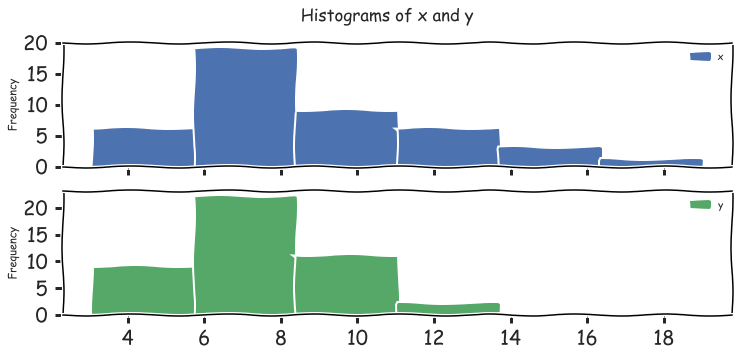

In [7]:
import matplotlib.pyplot as plt
with plt.xkcd():
    _=df.plot(kind='hist',title='Histograms of x and y',figsize=(12,5),bins=6,fontsize=20,subplots=True)
#plt.xlabel(,fontsize=16)

A histogram allows us to see **how many items of a column have the same range of values**, but it doesn't allow us to relate the values contained in one column of our dataset to the values contained in a another column for a given row. The histogram doesn't take into account the ordering of the data. 

## 2.2 The line plot

In order to see how the ordering of the data affects its value we can check the following plot:

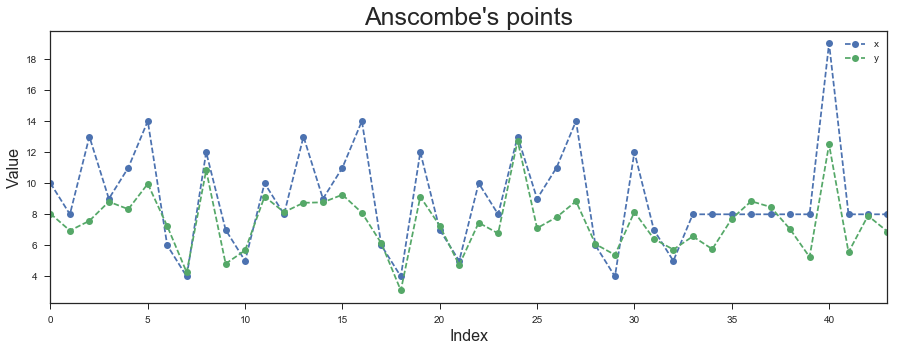

In [8]:
df[['x','y']].plot( linestyle='--', marker='o',figsize=(15,5))
plt.title("Anscombe's points",fontsize=25)
plt.xlabel('Index',fontsize=16)
_ = plt.ylabel('Value',fontsize=16)

This is called a *line plot*. In these plots we will represent the values of different columns in the *y axis* relative to its index value, represented in the *x axis*. This kind of plot helps us understand how the index value (and thus the order) affects the structure of the data. 

This plot also allows us to compare the values of different columns at a given moment (index value).

As we can see, this plot doesn't give us any intuitive idea of how the data is structured. This probably means that the index value does not have a meaning impact on how the data is structured. 


## 2.3 The scatter plot

Given that the two columns do not seem to be related to the index value, we will try to figure out if they are related to each other. One graphical way to see how the two series of points are related to each other is by means of a scatter plot.

In this plot, instead of plotting the value of a column against an index, we will plot it against the value the other column have at a given index. In this plot the ordering of the data doesn't matter (you cannot see the information contained in the index column in this plot.)

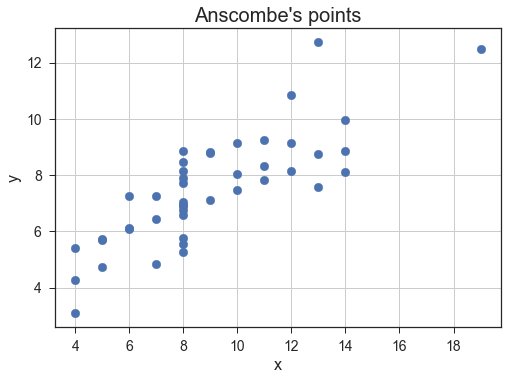

In [9]:
df.plot(kind='scatter',x='x',y='y',fontsize=14,s=75)
plt.title("Anscombe's points",fontsize=20)
plt.xlabel('x',fontsize=16)
plt.grid()
_ = plt.ylabel('y',fontsize=16)

This is a scatter plot. This speciffic plot answers the following question:

When a point of the data set in the column 'x' had a value of x, which was the value y contained in the column 'y'? (or vice versa).

In order to answer the question with the plot we only have to substitue the value x for the number we want, and search for that number in the lower *axis* of the plot, labeled *x*. The answer y will be the height of the points that lie in an straight parallel to the grid and starts at x.

Now, at least we can infer some structure in our data. In this plot it almost seems as if the points were more or less distributed across an imaginary straight line. 

## 3 Representing categories

Since now, we have not paid much attention to the 'dataset' column. This column is comprised of four different values:

In [10]:
df['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

It is possible to interpret the values contained in this column as labels attached to each row. This means that a categorical value can be interpreted as a column that allows us to break our dataset in different subsets. Each of the elements of these diferent "mini datasets" will have the same value. This is what is known as *grouping a data set by a categorical value".

We can also see that these labels represent numbers, so we will add a column to our database representing the same numeric value in decimal base. This way we can represent the information contained in the labels without getting errors in the pandas plotting interface. 

In [11]:
number_mapping = lambda x: x.count('I') if x.count('V')==0 else 4#apply a function value by value to all 
df['num_ix'] = df['dataset'].map(number_mapping)#the values contained a column
df.head(3)#change the number of displayed rows

,dataset,x,y,num_ix
0,I,10.0,8.04,1
1,I,8.0,6.95,1
2,I,13.0,7.58,1


In order to represent the category we will assign a different color to each different value. This means defining a *color map* between the label values and its visual representation. One of the possible ways of doing it is by manually defining a colormap. 

In [12]:
from matplotlib.colors import LinearSegmentedColormap
vmax=3
cmap = LinearSegmentedColormap.from_list('mycmap', [(0/vmax ,'blue'),
                                                    (1/vmax, 'green'),
                                                    (2/vmax, 'red'),
                                                    (3/vmax, 'yellow')]
                                        )



Now that we are ready to plot,we will see how the different categorical values are distributed across the dataset with the kind of plot we already know: the scatter plot.

We will make two different scatter plots. First we will plot the value of one numerical-valued column versus the index value, and we will color each point according to its 'dataset' category.

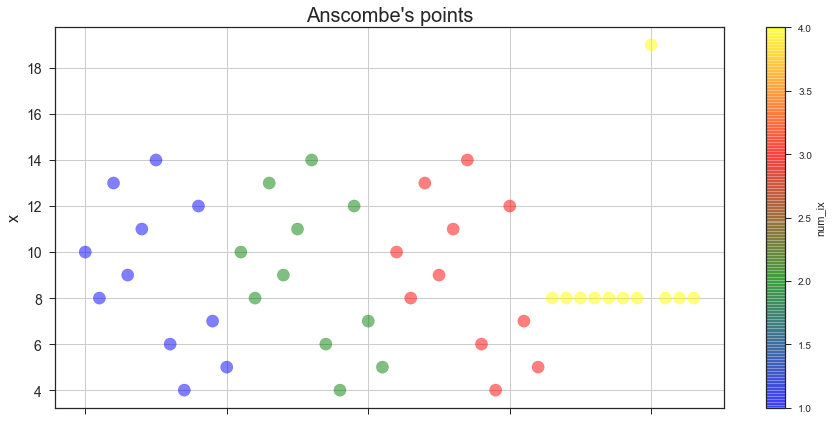

In [13]:

df.reset_index().plot(kind='scatter',
                      x='index',
                      y='x',
                      fontsize=14,
                      s=150,c='num_ix',
                      cmap=cmap,figsize=(15,7),alpha=0.5)
plt.title("Anscombe's points",fontsize=20)

plt.grid()
plt.ylabel('x',fontsize=16)
plt.xlabel('index',fontsize=16)

We can see in this plot how the index actually represents the different classes ordered. This supports our initial hypothesis that the index is not related to the 'x' and 'y' columns. Now lets take a look at how the
coloured scatter plot of x vs y looks.

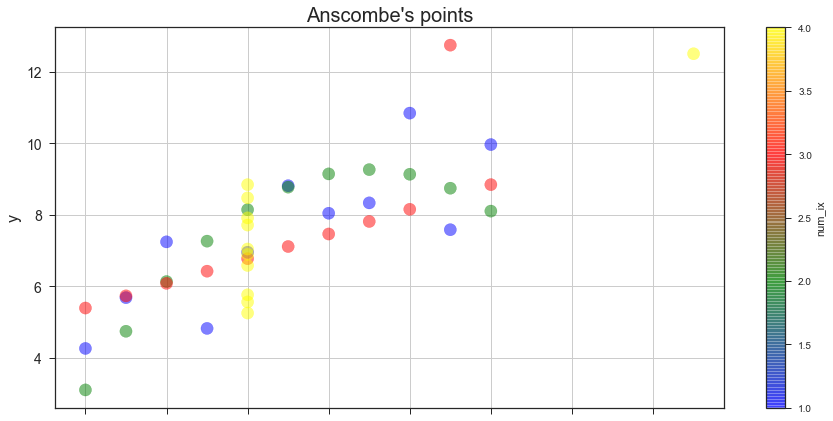

In [14]:
def color_scatter(df):
    df.plot(kind='scatter',x='x',y='y',fontsize=14,s=150,c='num_ix',cmap=cmap,figsize=(15,7),alpha=0.5)
    plt.title("Anscombe's points",fontsize=20)
    plt.xlabel('x',fontsize=16)
    plt.grid()
    _ = plt.ylabel('y',fontsize=16)
color_scatter(df)

We can clearly see that our Anscombe's dataset actually consists in four different datasets all added up together in the same DataFrame, and each of the category labels are used to separate each different dataset.

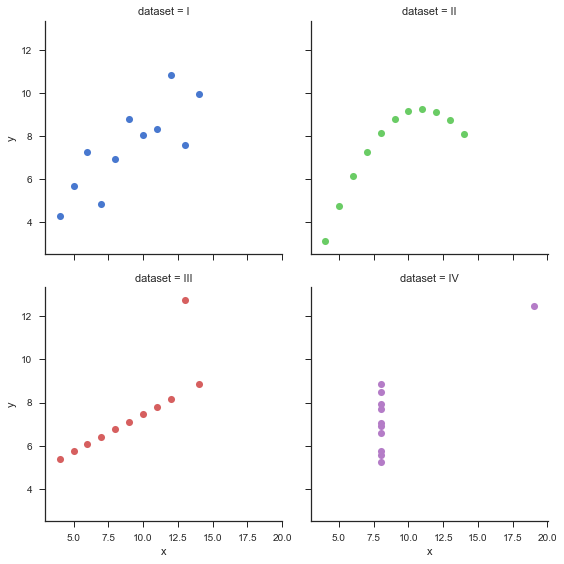

In [15]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1}, fit_reg=False)

## 4 Basic statistics

## 4.1 Subsampling the Anscombe's dataset

Now its time to analise each of the datasets conforming our dataframe independently. And we will start by selecting the data set labeled 'I'.

In [16]:
I = df[df.dataset == 'I'].copy()
I

,dataset,x,y,num_ix
0,I,10.0,8.04,1
1,I,8.0,6.95,1
2,I,13.0,7.58,1
3,I,9.0,8.81,1
4,I,11.0,8.33,1
5,I,14.0,9.96,1
6,I,6.0,7.24,1
7,I,4.0,4.26,1
8,I,12.0,10.84,1
9,I,7.0,4.82,1


In [17]:
len(df)

44

We can see that the new dataset contains 10 points. Now let's plot the "I" dataset to see how the points are distributed

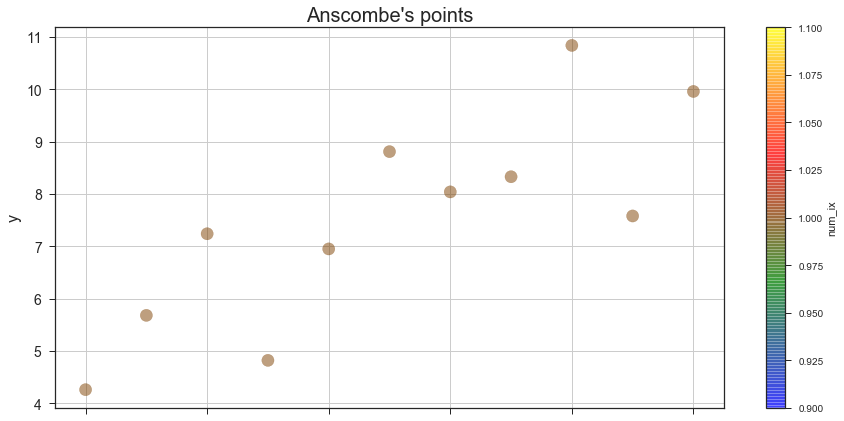

In [18]:
color_scatter(I)

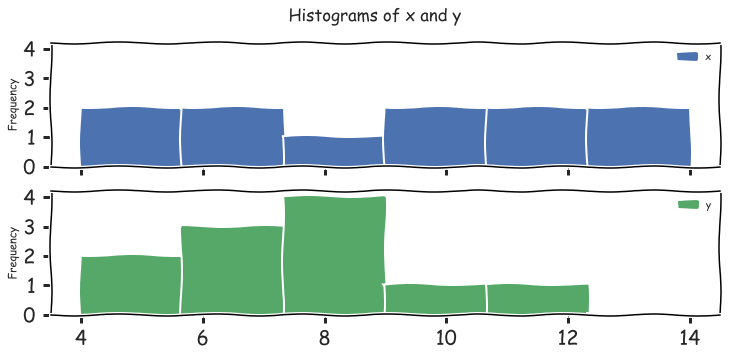

In [19]:
with plt.xkcd():
    _ =I[['x','y']].plot(kind='hist',title='Histograms of x and y',figsize=(12,5),bins=6,fontsize=20,sharey=True,subplots=True)

# 4.2 Why we need statistics

It is not easy to infer something meaningfull at first sight from this dataset. We can tell that the points seem to be distributed around an imaginary line, but it is something that is not easy to describe with words.

Statistics is a way of describing a dataset, but instead of using plots we are using numbers. That numbers will represent properties of our data set, and they are a way to quantify certain properties of a data set. you can think of it as a language to describe dataset where plots are not available.

## 4.3 Density and probability

We will try to define a quantity that tells us **how likely is to find a data point** in any point (x,y) from our scatter plot, and we will call this quantity *density*.

This concept is closely related to the histograms, as the higher the frecuency count the higher the *density* will be, as these magnitudes are proportional.

That would mean that the density is intuitively the height that an histogram would have at a given point. This makes the density of a 1 dimensional data set really easy to visualize using a histogram, but it is a little more tricky if we try to do this in 2D, as we will se later.

In [20]:
df.describe()

,x,y,num_ix
count,44.000000,44.000000,44.00000
mean,9.000000,7.500682,2.50000
std,3.198837,1.958925,1.13096
min,4.000000,3.100000,1.00000
25%,7.000000,6.117500,1.75000
50%,8.000000,7.520000,2.50000
75%,11.000000,8.747500,3.25000
max,19.000000,12.740000,4.00000


## 4.4 Calculating the probaility density

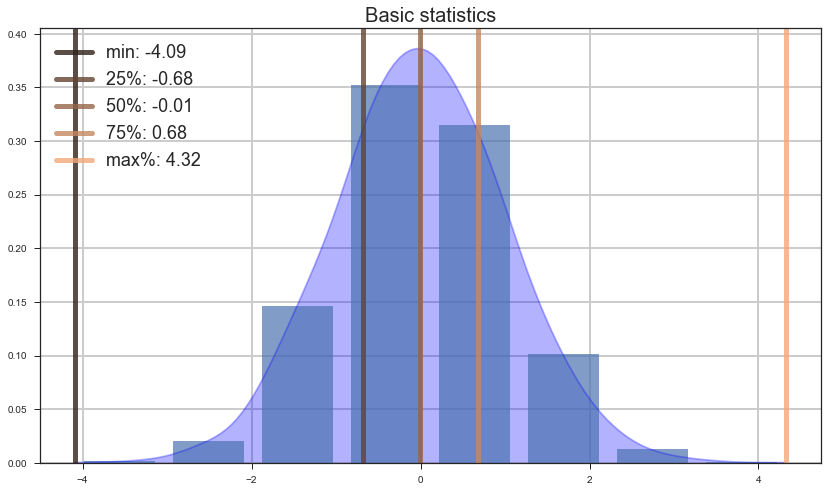

In [21]:
import numpy as np
from ipywidgets import interact, interactive, fixed
from IPython.core.display import clear_output,display
import ipywidgets as widgets
def draw_example_dist(n=10000):
    a = np.random.normal(loc=-15.,scale=3,size=n)
    b = np.random.normal(loc=20,scale=3,size=n)
    c = np.random.exponential(size=n,scale=3)
    return np.hstack([a,b,c])
example = draw_example_dist()
def draw_regions(distribution='normal',
                 bins=7,
                 bw=0.18,
                 normed=False,
                 mean=False,
                 std=False,
                 percents=False,
                 hist=True):
   
    x = draw_example_dist() if distribution=='example_2' else np.random.standard_normal(10000)
    x = draw_regions_data if distribution=='custom' else x
    fig = plt.figure(figsize=(14,8))
    #ax = fig.add_subplot(1, 1, 1)
    ax = sns.kdeplot(x, cut=0,color='b',shade=True,alpha=0.3,bw=bw)
    
    d_bins = np.linspace(x.min(),x.max(),num=bins)
    if hist:
        n, bins, patches = ax.hist(x,bins=d_bins,normed=normed,rwidth=0.8,alpha=0.7)
    else:
        n=[1]
    maxx = 1 if normed else max(n)
    if mean:
        
        ax.axvline(x=x.mean(), ymin=0, ymax = maxx,
                    linewidth=6, color='r',label='Mean: {:.3f}'.format(x.mean()),alpha=1.)
    if std:
        m = x.mean()
        
        ax.axvline(x=m+x.std(), ymin=0, ymax = maxx, linewidth=5, color='g',label='Std: {:.3f}'.format(x.std()),alpha=0.8)
        ax.axvline(x=m-x.std(), ymin=0, ymax = maxx, linewidth=5, color='g',alpha=0.8)
    if percents:
        d = pd.Series(x).describe()
        ax.axvline(x=d.ix['min'],
                    ymin=0, ymax = maxx,
                    linewidth=5, 
                    color=(0.19130826141258903, 0.13147472185630074, 0.09409307479747722),
                    label='min: {:.2f}'.format(d.ix['min']),alpha=0.8)
        ax.axvline(x=d.ix['25%'],
                    ymin=0, ymax = maxx,
                    linewidth=5, 
                    color=(0.38717148143023966, 0.26607979423298955, 0.19042646089965626),
                    label='25%: {:.2f}'.format(d.ix['25%']),alpha=0.8)
        ax.axvline(x=d.ix['50%'],
                    ymin=0, ymax = maxx,
                    linewidth=5, 
                    color=(0.5830347014478903, 0.4006848666096784, 0.2867598470018353),
                    label='50%: {:.2f}'.format(d.ix['50%']),alpha=0.8)
        ax.axvline(x=d.ix['75%'],
                    ymin=0, ymax = maxx,
                    linewidth=5, 
                    color=(0.7743429628604792, 0.5321595884659791, 0.3808529217993126),
                    label='75%: {:.2f}'.format(d.ix['75%']),alpha=0.8)
        ax.axvline(x=d.ix['max'],
                    ymin=0, ymax = maxx,
                    linewidth=5, 
                    color=(0.9415558823529412, 0.663581294117647, 0.47400294117647046),
                    label='max%: {:.2f}'.format(d.ix['max']),alpha=0.8)
        
       # ax.plot((m-0.1, m+0.1), (0,max(n)), 'k-')
    plt.grid(linewidth=2)
    plt.title("Basic statistics",fontsize=20)
    plt.legend(loc='upper left',fontsize=18)
    plt.show()
    
    clear_output(True)
display(interact(draw_regions,bins=(1,100,2),bw=(0.01,10.,0.025),
             normed=False,distribution=['Normal','exmple_2','custom']))


## 4.5 2d density 

In [22]:

#from shaolin import KungFu
def draw_regions(x_regions,y_regions):
    I = df
    x,y = I.x,I.y
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x,y)
    plt.xticks(np.linspace(x.min(),x.max(),num=x_regions))
    plt.yticks(np.linspace(y.min(),y.max(),num=y_regions))
    plt.grid(linewidth=2)
   
    plt.show()
    
    clear_output(True)
display(interact(draw_regions,x_regions=(0,30), y_regions=(0,30)))

<function __main__.draw_regions>

In [23]:
def density_plot(linreg_order=1,confidence_intervals=95,bandwidth=1.43,**kwargs):
    if False:# 'bandwidth' not in kwargs.keys():
        kwargs['bandwith'] = 1
    data=jointplot_data
    clear_output()
    if kwargs['dataset']=='ALL':
        subdf = data.copy()
    else:
        subdf = data[data['dataset']==kwargs['dataset']].copy()
    x,y = subdf.x,subdf.y
    x_regions = 10
    y_regions = 10
    x_bins = np.linspace(x.min(),x.max(),num=kwargs['num_xbins'])
    y_bins = np.linspace(y.min(),y.max(),num=kwargs['num_ybins'])

    g = sns.JointGrid(x="x", y="y", data=subdf)

    g.fig.set_figwidth(14)
    g.fig.set_figheight(9)
    if kwargs['plot_density']:
        g = g.plot_joint(sns.kdeplot, shade=True,alpha=0.5,legend=True,
                         bw=bandwidth,
                         gridsize=int((len(x_bins)+len(y_bins))/2),
                         clip=((x.min(),x.max()),(y.min(),y.max())))

    if kwargs['scatter']:# and not self.kwargs['regression']:
        g = g.plot_joint(plt.scatter)


    if kwargs['marginals'] in ['Histogram','Both']:
        _ = g.ax_marg_x.hist(x, alpha=.6,
                              bins=x_bins,normed=True)
        _ = g.ax_marg_y.hist(y, alpha=.6,
                               orientation="horizontal",
                               bins=y_bins,normed=True)
    if kwargs['marginals'] in ['KDE','Both']:
        clip = ((x.values.min()-0.1,x.values.max()+0.1),(y.values.min()-0.1,y.values.max()+0.1))
        g = g.plot_marginals(sns.kdeplot, **dict(shade=True))#,bw=kwargs['bandwith']))#,
                         #gridsize=int((len(x_bins)+len(y_bins))/2)))
                         #clip=clip)
    if kwargs['regression']:
        g = g.plot_joint(sns.regplot,
                         truncate=True,
                         order=linreg_order,
                         ci=confidence_intervals,
                         scatter_kws={"s": 80}
                        )
    if kwargs['grid']:
        _ = plt.grid(linewidth=2) 
        _ = plt.xticks(x_bins)
        plt.yticks(y_bins)

    _ = plt.xlim(x.values.min(),x.values.max())
    _ = plt.ylim(y.values.min(),y.values.max())


    _ = plt.show()
    if kwargs['save']:
        _ =plt.savefig("data/density_plot_{}.png".format(0), dpi=100)
        

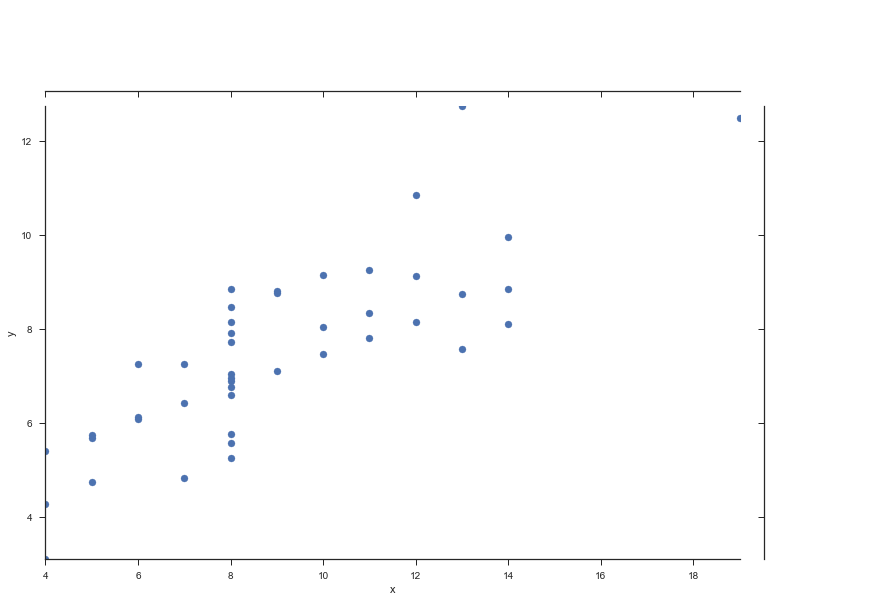

In [24]:
kwargs= {'num_xbins':(1,50,2),
         'num_ybins':(1,50,2),
         'bandwidth':(0.001,10,0.025),
         'grid': True,
         'plot_density':False,
         'scatter':True,
         'regression':False,
         'linreg_order':(1,5,1),
         'confidence_intervals':(1,100,1),
         'marginals':['None','Histogram','KDE','Both'],


         'dataset':['ALL','I','II','III','IV'],
         'save':False,
         #'@kernel':['gau','cos','biw','epa','tri','triw']
        }
jointplot_data = df
display(interact(density_plot,**kwargs))

# 5 Grouping datasets

In [24]:
import numpy as np
df['new_index'] = df.groupby('dataset').transform(lambda x:np.arange(len(x)))['x'].values
idx = pd.IndexSlice
sep = df.pivot(columns='dataset',index='new_index')
sep.loc[:,idx[:,'I']]

,x,y,num_ix
dataset,I,I,I
new_index,,,
0,10.0,8.04,1
1,8.0,6.95,1
2,13.0,7.58,1
3,9.0,8.81,1
4,11.0,8.33,1
5,14.0,9.96,1
6,6.0,7.24,1
7,4.0,4.26,1


In [25]:
sep

x                        y                     num_ix          
dataset       I    II   III    IV      I    II    III     IV      I II III IV
new_index                                                                    
0          10.0  10.0  10.0   8.0   8.04  9.14   7.46   6.58      1  2   3  4
1           8.0   8.0   8.0   8.0   6.95  8.14   6.77   5.76      1  2   3  4
2          13.0  13.0  13.0   8.0   7.58  8.74  12.74   7.71      1  2   3  4
3           9.0   9.0   9.0   8.0   8.81  8.77   7.11   8.84      1  2   3  4
4          11.0  11.0  11.0   8.0   8.33  9.26   7.81   8.47      1  2   3  4
5          14.0  14.0  14.0   8.0   9.96  8.10   8.84   7.04      1  2   3  4
6           6.0   6.0   6.0   8.0   7.24  6.13   6.08   5.25      1  2   3  4
7           4.0   4.0   4.0  19.0   4.26  3.10   5.39  12.50      1  2   3  4
8          12.0  12.0  12.0   8.0  10.84  9.13   8.15   5.56      1  2   3  4
9           7.0   7.0   7.0   8.0   4.82  7.26   6.42   7.91      1  2   3  4
10          5.0   5.0   5.0   8.0   5.68  4.74   5.73   6.89      1  2   3  4

In [26]:
groups = ['I', 'II', 'III', 'IV']
for group in groups:
    print(group)
    print(df[df.dataset == group].describe())
    print()

I
               x          y  num_ix  new_index
count  11.000000  11.000000    11.0  11.000000
mean    9.000000   7.500909     1.0   5.000000
std     3.316625   2.031568     0.0   3.316625
min     4.000000   4.260000     1.0   0.000000
25%     6.500000   6.315000     1.0   2.500000
50%     9.000000   7.580000     1.0   5.000000
75%    11.500000   8.570000     1.0   7.500000
max    14.000000  10.840000     1.0  10.000000

II
               x          y  num_ix  new_index
count  11.000000  11.000000    11.0  11.000000
mean    9.000000   7.500909     2.0   5.000000
std     3.316625   2.031657     0.0   3.316625
min     4.000000   3.100000     2.0   0.000000
25%     6.500000   6.695000     2.0   2.500000
50%     9.000000   8.140000     2.0   5.000000
75%    11.500000   8.950000     2.0   7.500000
max    14.000000   9.260000     2.0  10.000000

III
               x          y  num_ix  new_index
count  11.000000  11.000000    11.0  11.000000
mean    9.000000   7.500000     3.0   5.000000
st

Let's compare the correlation coefficient for each dataset

In [27]:
for g in groups:
    print(df[df.dataset == g]['x'].corr(df[df.dataset == g]['y']))

0.816420516345
0.816236506
0.81628673949
0.816521436889


## 6 Quick Plotting

Plot datasets

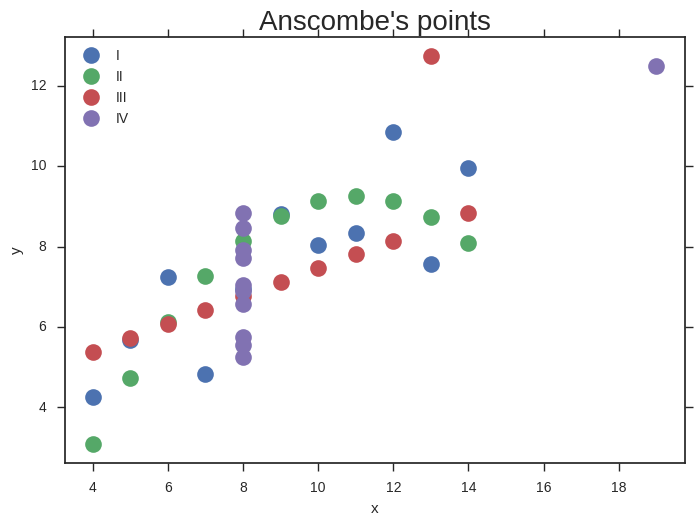

In [35]:
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
groups = df.groupby('dataset')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend(loc=2)
plt.title("Anscombe's points",fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

plt.show()



/home/kalidus/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


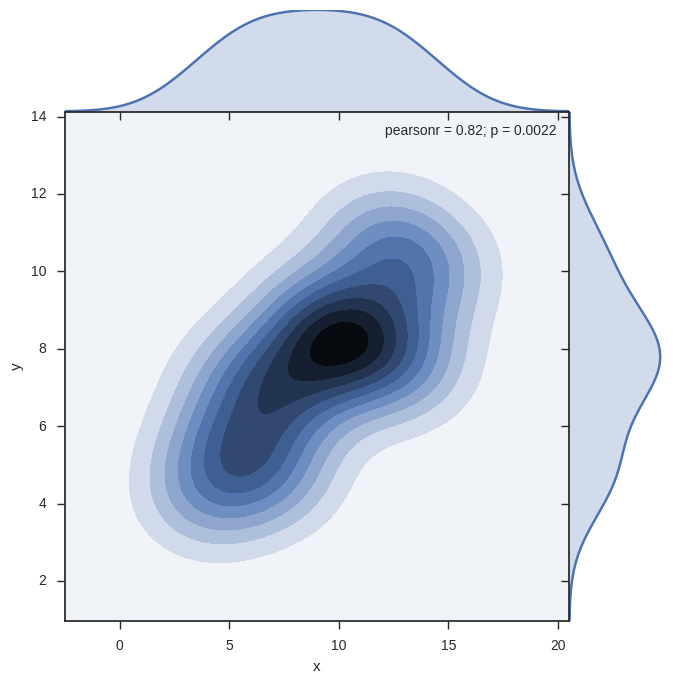

In [29]:
g = sns.jointplot(x="x", y="y",data=df[df['dataset']=='I'], kind="kde", size=7, space=0)

# 6.1 Histograms

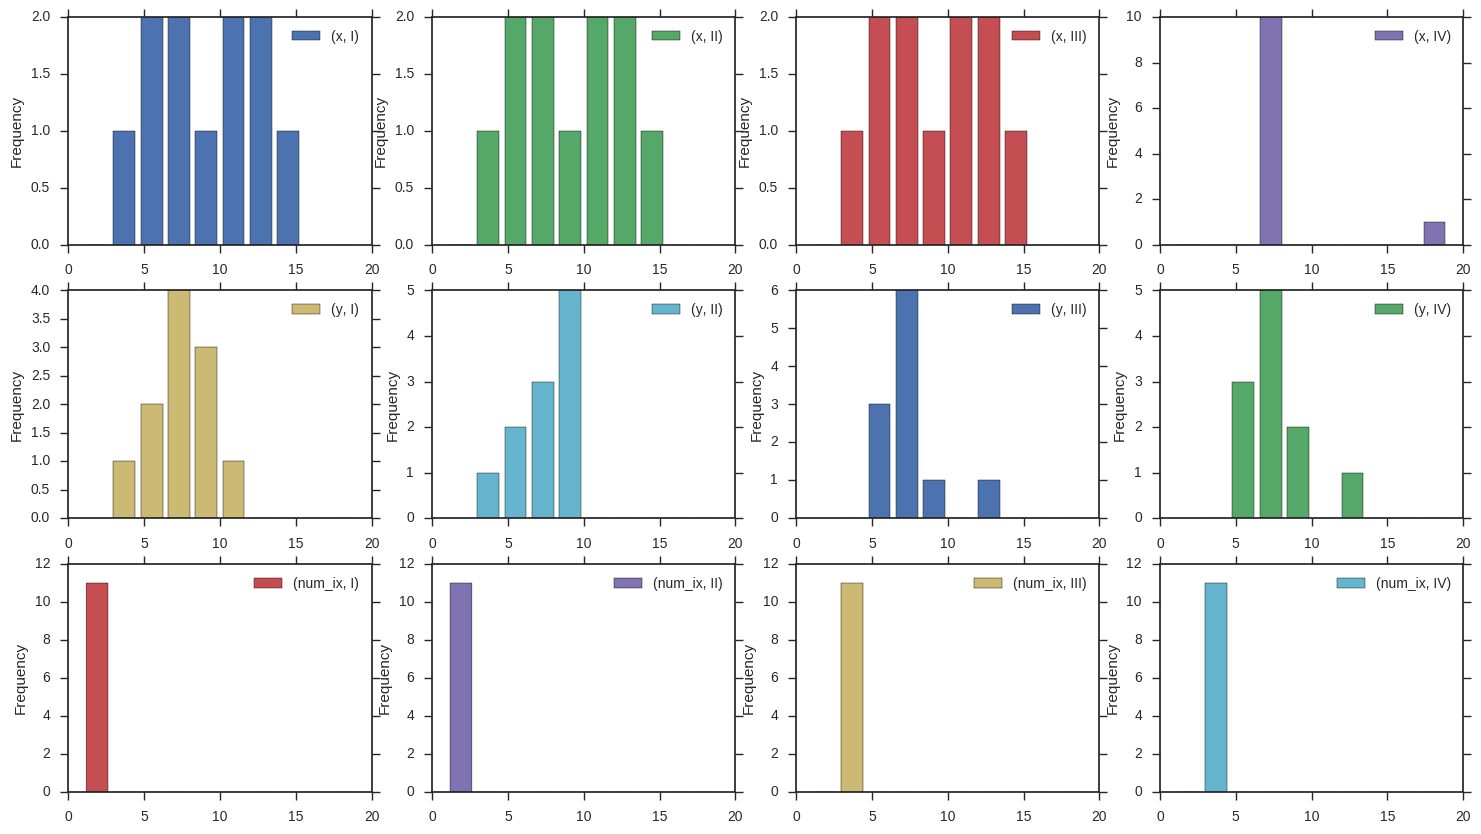

In [30]:
_=sep.plot(kind='hist',subplots=True,figsize=(18,10),layout=(3,4),sharex=False,rwidth=0.8)

## 6.2 Linear regression

Show the results of a **linear regression** within each dataset

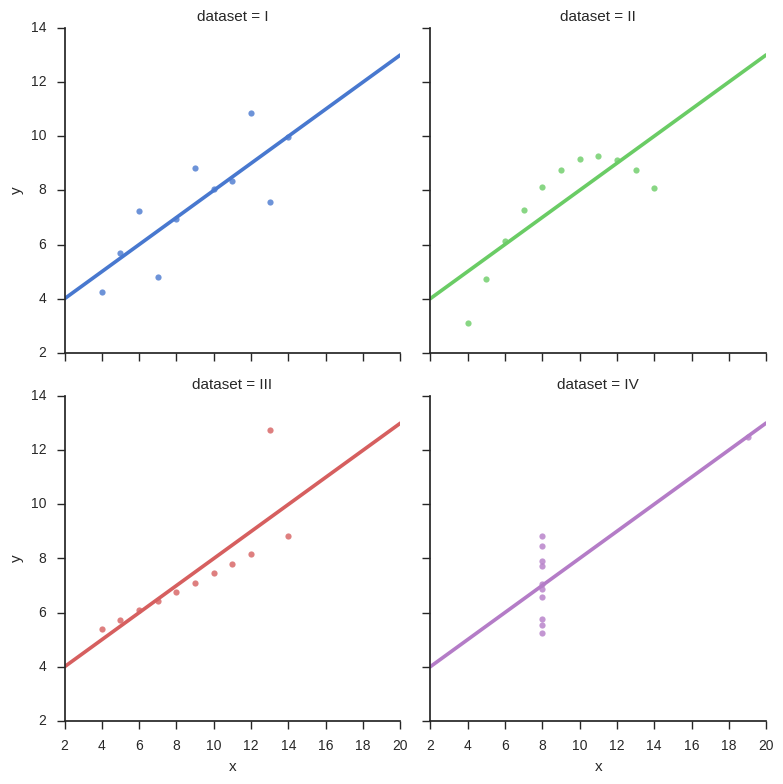

In [31]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4)

It's the same line for all datasets

Let's plot with its 95% confidence interval region.

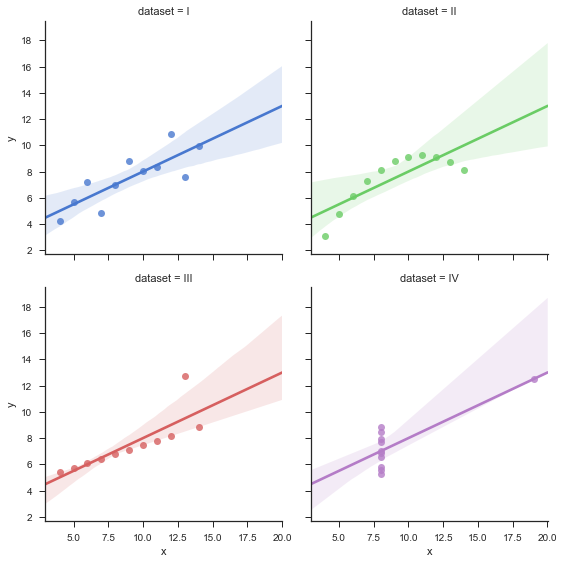

In [51]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=95, palette="muted", size=4)

# Key message

Visualize your data beforehand

## Nonlinear regression? outliers?

One can fit a polynomial regression model to explore simple kinds of **nonlinear** trends in the dataset

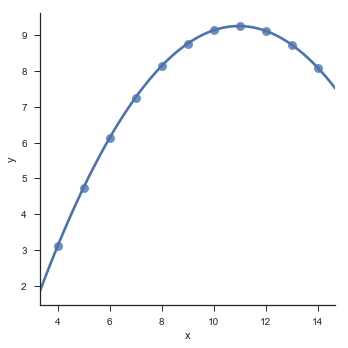

In [52]:
sns.lmplot(x="x", y="y", data=df[df.dataset == 'II'],
           order=2, ci=95, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

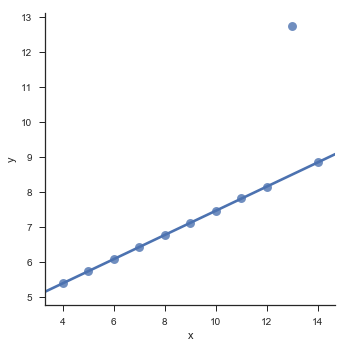

In [53]:
sns.lmplot(x="x", y="y", data=df[df.dataset == 'III'],
           robust=True, ci=None, scatter_kws={"s": 80});